**Capstone Project Submission - Phase 5**<br>

Student Name: **GROUP 10**<br>
Members : **Cynthia Nasimiyu, Julius Charles, Wambui Thuku, John Karanja, Ismail Ibrahim, Mariacharlote Mbiyu**<br>
Student pace: **Part Time**<br>
Scheduled Project review date/time: **16th October 2023**<br>

# PREDICTIVE FOOD PRICING MODEL IN KENYA


## Project Overview

## 1.0 Business Understanding

### 1.1 Background

Food security in Kenya is the foundation of a stable and prosperous society. Kenya’s ability to provide to its population with reliable access to safe and nutritious food is a fundamental indicator of its overall well-being.<br>

The Agricultural sector accounts for 65% of the export earnings, and provides the livelihood (employment, income and food security needs) for more than 80 per cent of the Kenyan population and contributes to improving nutrition through production of safe, diverse and nutrient dense foods as stated in FAO in kenya article - Kenya at a glance, published in 2023. https://www.fao.org/kenya/fao-in-kenya/kenya-at-a-glance/en/

Crop cultivation is a pivotal driver of Kenya's economic progress, serving as a significant supplier of sustenance, revenue, job opportunities, and a means to curtail foreign currency expenses via reduced reliance on imports.<br> According to Kenya’s food directorate website, https://food.agricultureauthority.go.ke/index.php/sectors/overview , as of September 2023, “ Food Crops as a sub-sector of the agricultural sector contributes approximately 33% of the total agricultural GDP and accounts for a large share of agricultural output.”<br>

It is thus important that accurate food price forecasting and market analysis are available for the various stakeholders in the agricultural sector considering the impact it has on the economy.<br>


### 1.2 Problem Statement

The Food Directorate Office further emphasizes that in Kenya, the primary food crops include maize, wheat, rice, potatoes, green grams, and beans. <br>Maize, in particular, serves as the predominant staple food and is cultivated in approximately 90% of all Kenyan agricultural farms.<br>
Among legumes, the common bean takes precedence, while the Irish potato stands out as the paramount tuber crop.<br>

Our problem statement is geared toward assisting Kenyan farmers in acquiring foresight into forthcoming commodity prices, enabling them to make informed decisions regarding planning and sales. Additionally, it empowers retailers to optimize their product positioning and promotional strategies to maximize profitability. <br>
Our project endeavors to fulfill these critical needs through the utilization of advanced data science methodologies.<br>


### 1.3 Project  Objectives

In order to answer the problem statement and guide the research activities, we embark on the below project  objectives which are specific and measurable.<br>

1. To identify key patterns and trends and relationships in the data <br>
    - How crop prices trends over time<br>
	- To segment regions based on crops and prices i.e. coastal, inland, rural and urban. <br>
    - To analyze the different food categories and commodities.<br>
    - To determine Geospatial Analysis based of the latitude and longitude data. i.e heatmaps<br>
    - To investigate potential correlations between food prices and other variables, such as weather conditions(Regions), crop yields, or socio-economic factors. <br>

2. Develop a predictive robust timeseries model that predicts the future prices of key agricultural commodities in Kenya<br>

3. Create a Market Basket Analysis for Retailers<br>

4. To deploy a crop pricing model.<br>

5. To provide recommendations on the outcomes of the project to our stakeholders <br>

### 1.4 Stakeholders

The primary stakeholders for this project are **Kenyan Farmers** and **Retailers specialising in Cashcrops**

A general complaint among Kenyan farmers in the public, is that they do not make enough income from their farm outputs.

## 2.0 Data Understanding

The main dataset contains Food Prices data for Kenya, sourced from the World Food Programme Price Database.  <br>
The data covers a time period from January 15, 2006 to February 15, 2024.<br>
The data can be accessed on this link : https://data.humdata.org/dataset/wfp-food-prices-for-kenya <br>

Other external datasets were merged into our main dataset for better prediction including Inflation rates sourced from the central bank of kenya https://www.centralbank.go.ke/inflation-rates/ and weather patterns

**Kenyan sources of the data for the WFP**: Arid Lands Resource Management Project (ALRMP), Energy Regulatory Commision, Energy Regulatory Commission (ERC), Energy and Petroleum Regulatory Authority (EPRA), FPMA, Kenya National Bureau of Statistics (KNBS), MOA, Ministry of Agriculture, Ministry of Agriculture (MOA), National Drought Management Authority (NDMA), Regional Agricultural Trade Intelligence Network via FAO: GIEWS, State Department of Agriculture, WFP, World Food Programme (WFP) Monitoring.<br>


In [6]:
#Install this section on your command prompt
!pip install pyforest
!pip install lazypredict
!pip install pmdarima
!pip install tensorflow

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=6af87619f061080926b3a0a33c07e6d42d61eb26e8a58c2b8b2c10475d8a0faf
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00


In [10]:
#Import necessary libraries
from pyforest import *

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import csv
import pandas as pd
import openpyxl
import numpy as np
from sklearn.cluster import KMeans
import datetime
from datetime import date,timedelta
import os
import plotly.express as px
import seaborn as sns


In [11]:
#load the data and read the 1st 5 lines
df = pd.read_csv('wfp_food_prices_ken.csv', skiprows=[1])
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355


In [12]:
df.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
18573,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Salt,200 G,forecast,Retail,KES,0.0,0.0
18574,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Sugar,KG,forecast,Retail,KES,0.0,0.0
18575,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,oil and fats,Oil (vegetable),L,forecast,Retail,KES,0.0,0.0
18576,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,pulses and nuts,Beans (dry),KG,forecast,Retail,KES,0.0,0.0
18577,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Bananas,Unit,forecast,Retail,KES,0.0,0.0


In [13]:
#Analyse the dataframe
def analyze_dataset(df):

    # confirm type of df
    print(type(df))
    print("*"*50)

    # Dataset shape
    print("Shape of the dataset:", df.shape,'\n')
    print("*"*50)

    # Missing values
    null_counts = df.isnull().sum()
    print("Null columns only:", null_counts[null_counts > 0])
    print("*"*50)

    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]),'\n')
    print("*"*50)

    # Number of columns
    num_columns = len(df.columns)
    print("Number of columns:", num_columns)
    print("*"*50)

    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')
    print("*"*50)

    print("The unique Kenyan Regions are:")
    print(df['admin1'].unique(),'\n')
    print("*"*50)

    print("The unique Kenyan Markets are:")
    print(df['market'].unique(),'\n')
    print("*"*50)

    print("The unique Food Categories are:")
    print(df['category'].unique(),'\n')
    print("*"*50)

    print("The unique Kenyan Commodities are:")
    print(df['commodity'].unique(),'\n')
    print("*"*50)


    # Dataset information
    print("Information about the dataset:")
    print(df.info())
    print("*"*50)

analyze_dataset(df)

<class 'pandas.core.frame.DataFrame'>
**************************************************
Shape of the dataset: (18578, 14) 

**************************************************
Null columns only: Series([], dtype: int64)
**************************************************
Number of duplicates: 0 

**************************************************
Number of columns: 14
**************************************************
The unique values per column are:
date           218
admin1           7
admin2          22
market          62
latitude        62
longitude       62
category         8
commodity       47
unit            14
priceflag        3
pricetype        2
currency         1
price         6986
usdprice     11429
dtype: int64 

**************************************************
The unique Kenyan Regions are:
['Coast' 'Eastern' 'Nairobi' 'North Eastern' 'Nyanza' 'Rift Valley'
 'Central'] 

**************************************************
The unique Kenyan Markets are:
['Mombasa' 'Kitui'

### Summary of Main Dataframe

- Our main dataset contains information on food commodity prices for various Kenyan regions. <br>

- There are 14 columns and 18,578 rows which are indexed from 0 to 18,577. <br>
- The columns are named  **"date, admin1, admin2, market, latitude, longitude, category, commodity, unit, priceflag, pricetype, currency, price, usdprice**<br>

To expound further on the columns:
1. The **date** column represents the entry dates per month starting from  2016-01-15<br>
2. The **admin1** column has the regions for the country .<br>The unique Kenyan Regions are:'Coast' 'Eastern' 'Nairobi' 'North Eastern' 'Nyanza' 'Rift Valley'
 'Central'<br>
3. The **admin2** column has the county locations which would be a smaller representation of the regions i.e Mombasa, Kisumu<br>
4. The **market** column represents the areas where the goods were bought/sold from.<br>
5. The **latitude and longitude**columns indicate the geographical coordinates of the locations stated in the dataset.<br>
6. The **category** column represents the classification of the different food commodities within the dataset. <br>
The unique Food Categories are:'cereals and tubers' 'pulses and nuts' 'milk and dairy' 'oil and fats' 'non-food' 'meat, fish and eggs' 'miscellaneous food' 'vegetables and fruits'<br>
7. The **commodity** column indicates foods currently in the dataset for Kenya.
8. The **unit** column represents the unit of measure of the commodities. KG , litres
9. The **priceflag**  column indicates where a price is a forecast or an actual figure in the market.
10. The **pricetype** column represents if a commodity was sold as wholesale or retail.
11. The**currency** column shows the used currency in the dataset
12. The **price** column shows the selling figures allocated per each commodity per region
13. The **usdprice** column


- The dataframe contains two main data types<br>

    - 4 float data types
    - 10 Object data types

-  The dataset contains no missing values in any of its rows or comlumns.<br>

-  No duplicates were identified in the columns however, unique values were found in various columns such as markets and commodities.<br>
For example: **The unique Kenyan Commodities** are:
['Maize' 'Maize (white)' 'Beans' 'Beans (dry)' 'Potatoes (Irish)'
 'Sorghum' 'Bread' 'Milk (cow, pasteurized)' 'Oil (vegetable)'
 'Fuel (diesel)' 'Fuel (kerosene)' 'Fuel (petrol-gasoline)' 'Maize flour'
 'Rice' 'Wheat flour' 'Meat (beef)' 'Meat (goat)' 'Milk (UHT)' 'Sugar'
 'Cooking fat' 'Bananas' 'Kale' 'Onions (red)' 'Tomatoes'
 'Potatoes (Irish, red)' 'Beans (kidney)' 'Beans (rosecoco)'
 'Beans (yellow)' 'Cabbage' 'Onions (dry)' 'Spinach'
 'Potatoes (Irish, white)' 'Rice (aromatic)' 'Sorghum (red)'
 'Beans (dolichos)' 'Cowpeas' 'Cowpea leaves' 'Maize (white, dry)'
 'Beans (mung)' 'Millet (finger)' 'Rice (imported, Pakistan)'
 'Fish (omena, dry)' 'Sorghum (white)' 'Salt' 'Meat (camel)'
 'Milk (camel, fresh)' 'Milk (cow, fresh)']

 - Finally, the dataset consumes approximately 2.0+ megabyted of memory


## 3.0 Data Preparation

### 3.1 Data Merging & Cleaning

In this step, our main dataset undergoes through merging of additional data which we deem fit for the analysis. <br>
Cleaning and prepartion is also carried out to ensure quality and realibility
1. Inflation dataset from the central Bank of Kenya and data on rainfall is "merged" to our main data. This is done by converting the "Date" column in both dataframes to a datetime format then setting them as the index columns to enable merging
2. Renaming columns to represent the data correctly
3. Unnecessary columns are dropped
4. Columns with zero values are removed

*Main dataframe*: We create a copy of our main dataframe and set time as index to enable merging other dataframes

In [14]:
#create a copy of the dataframe
df2 = df.copy()

In [15]:
# Set the "Date" column as the index
df2['date'] = pd.to_datetime(df2['date'])

# Extract month and year and store them in new columns
df2['time'] = df2['date'].dt.strftime('%Y-%m')
df2.set_index('time', inplace=True)
df2.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
time,,,,,,,,,,,,,,
2024-02,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Salt,200 G,forecast,Retail,KES,0.0,0.0
2024-02,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Sugar,KG,forecast,Retail,KES,0.0,0.0
2024-02,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,oil and fats,Oil (vegetable),L,forecast,Retail,KES,0.0,0.0
2024-02,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,pulses and nuts,Beans (dry),KG,forecast,Retail,KES,0.0,0.0
2024-02,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Bananas,Unit,forecast,Retail,KES,0.0,0.0


*Inflation dataframe*

In [16]:
# Viewing the inflation  dataframe
inflation_df = pd.read_csv('Inflation Rates.csv')
inflation_df.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,August,8.52,6.73
1,2023,July,8.68,7.28
2,2023,June,8.77,7.88
3,2023,May,8.78,8.03
4,2023,April,8.71,7.90


In [17]:
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      225 non-null    int64  
 1   Month                     225 non-null    object 
 2   Annual Average Inflation  225 non-null    float64
 3   12-Month Inflation        225 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
# Merge "Year" and "Month" into a new "Date" column in the format 'YYYY-MM'
inflation_df['Date'] = pd.to_datetime(inflation_df['Year'].astype(str) + '-' + inflation_df['Month'], format='%Y-%B')

# Extract month and year and store them in new columns
inflation_df['time'] = inflation_df['Date'].dt.strftime('%Y-%m')
inflation_df

# Drop the unnecessary columns
inflation_df.drop(columns=['Annual Average Inflation', 'Date', 'Year', 'Month'], inplace=True)

# Rename the "12-Month Inflation" column to "Inflation Rate"
inflation_df.rename(columns={'12-Month Inflation': 'inflation rate'}, inplace=True)

# Convert the "Date" column to a datetime index
inflation_df.set_index('time', inplace=True)
inflation_df

,inflation rate
time,
2023-08,6.73
2023-07,7.28
2023-06,7.88
2023-05,8.03
2023-04,7.90
...,...
2005-05,14.78
2005-04,16.02
2005-03,14.15


Merging the main and inflation dataframe using 'time' index column

In [19]:
# merging dataframes
merged_df1 = pd.merge(df2, inflation_df, on="time", how="inner")
# renaming columns
merged_df1 = merged_df1.rename(columns={'admin1': 'province', 'admin2': 'county'})
merged_df1.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate
time,,,,,,,,,,,,,,,
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,8.39
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041,8.39
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,8.39
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705,8.39
2006-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,8.39


In [20]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17711 entries, 2006-01 to 2023-08
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            17711 non-null  datetime64[ns]
 1   province        17711 non-null  object        
 2   county          17711 non-null  object        
 3   market          17711 non-null  object        
 4   latitude        17711 non-null  float64       
 5   longitude       17711 non-null  float64       
 6   category        17711 non-null  object        
 7   commodity       17711 non-null  object        
 8   unit            17711 non-null  object        
 9   priceflag       17711 non-null  object        
 10  pricetype       17711 non-null  object        
 11  currency        17711 non-null  object        
 12  price           17711 non-null  float64       
 13  usdprice        17711 non-null  float64       
 14  inflation rate  17711 non-null  float64       
dtyp

*Rainfall data*

In [23]:
rainfall_df = pd.read_csv('Rainfall.csv')
rainfall_df.head(12)

,Year,Month,Dekad,Rainfall(mm),Average(mm)
0,2005,1,1,2.6383,9.0490
1,2005,1,2,2.3078,10.2445
2,2005,1,3,23.7976,9.7117
3,2005,2,1,3.4019,8.6781
4,2005,2,2,4.1204,11.6488
5,2005,2,3,12.5951,8.7773
6,2005,3,1,12.3978,20.7857
7,2005,3,2,20.1949,22.0756
8,2005,3,3,31.7368,30.5914
9,2005,4,1,31.2677,38.0823


In [24]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          720 non-null    int64  
 1   Month         720 non-null    int64  
 2   Dekad         720 non-null    int64  
 3   Rainfall(mm)  720 non-null    float64
 4   Average(mm)   720 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 28.2 KB


In [25]:
# Removing rows with zero rainfall values
rainfall_df= rainfall_df[rainfall_df['Rainfall(mm)'] != 0]

In [26]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          674 non-null    int64  
 1   Month         674 non-null    int64  
 2   Dekad         674 non-null    int64  
 3   Rainfall(mm)  674 non-null    float64
 4   Average(mm)   674 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 31.6 KB


In [27]:
# Format the rainfall_df for ease of merging into our main dataframe

def calculate_rainfall_average_by_dekad(rainfall_df):
    # Group the data by Year, Month, and Dekad, and then calculate the sum of rainfall for each group
    grouped = rainfall_df.groupby(['Year', 'Month', 'Dekad']).agg({'Rainfall(mm)': 'sum'}).reset_index()

    # Calculate the average for every three dekads (i.e., every three-month period)
    dekad_averages = []
    year_values = []
    month_values = []

    for i in range(0, len(grouped), 3):
        if i + 2 < len(grouped):
            three_month_average = grouped.iloc[i:i+3]['Rainfall(mm)'].mean()
            dekad_averages.append(three_month_average)
            year_values.append(int(grouped.iloc[i]['Year']))
            month_values.append(int(grouped.iloc[i]['Month']))

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'Year': year_values,
                              'Month': month_values,
                              'rainfall_avg': dekad_averages})

    return result_df

# Call the function with your Rainfall DataFrame
dekad_averages_df = calculate_rainfall_average_by_dekad(rainfall_df)

# Merge 'Year' and 'Month' columns into a single datetime column without the day
dekad_averages_df['time'] = pd.to_datetime(dekad_averages_df['Year'].astype(str) + '-' + dekad_averages_df['Month'].astype(str), format='%Y-%m')

# Format the 'time' column to include only year and month
dekad_averages_df['time'] = dekad_averages_df['time'].dt.strftime('%Y-%m')

# Set the 'time' column as the index
dekad_averages_df.set_index('time', inplace=True)

# Drop the 'Year' and 'Month' columns if no longer needed
dekad_averages_df.drop(['Year', 'Month'], axis=1, inplace=True)

# Print the results DataFrame
dekad_averages_df.head()


,rainfall_avg
time,
2005-01,9.581233
2005-02,6.705800
2005-03,21.443167
2005-04,29.629700
2005-05,38.842200


Merging the rainfall dataframe into our main dataframe

In [28]:
# Convert the 'time' column in the dekad_averages_df DataFrame to a datetime format with only year and month
dekad_averages_df.index = pd.to_datetime(dekad_averages_df.index, format='%Y-%m')

# Ensure that the index in the merged_df DataFrame is also in datetime format with only year and month
merged_df1.index = pd.to_datetime(merged_df1.index, format='%Y-%m')

# Merge the two DataFrames using their index (which is now in datetime format)
merged_df = merged_df1.merge(dekad_averages_df, left_index=True, right_index=True, how='left')

# Print the final merged DataFrame
merged_df.head()



,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg
time,,,,,,,,,,,,,,,,
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,8.39,5.2364
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041,8.39,5.2364
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,8.39,5.2364
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705,8.39,5.2364
2006-01-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,8.39,5.2364


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17711 entries, 2006-01-01 to 2023-08-01
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            17711 non-null  datetime64[ns]
 1   province        17711 non-null  object        
 2   county          17711 non-null  object        
 3   market          17711 non-null  object        
 4   latitude        17711 non-null  float64       
 5   longitude       17711 non-null  float64       
 6   category        17711 non-null  object        
 7   commodity       17711 non-null  object        
 8   unit            17711 non-null  object        
 9   priceflag       17711 non-null  object        
 10  pricetype       17711 non-null  object        
 11  currency        17711 non-null  object        
 12  price           17711 non-null  float64       
 13  usdprice        17711 non-null  float64       
 14  inflation rate  17711 non-null  float

Removing zero values in the price column

In [30]:
zero_price_count = len(merged_df[merged_df['price'] == 0])
zero_price_count

1771

In [31]:
merged_df = merged_df[merged_df['price'] != 0]

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15940 entries, 2006-01-01 to 2023-08-01
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            15940 non-null  datetime64[ns]
 1   province        15940 non-null  object        
 2   county          15940 non-null  object        
 3   market          15940 non-null  object        
 4   latitude        15940 non-null  float64       
 5   longitude       15940 non-null  float64       
 6   category        15940 non-null  object        
 7   commodity       15940 non-null  object        
 8   unit            15940 non-null  object        
 9   priceflag       15940 non-null  object        
 10  pricetype       15940 non-null  object        
 11  currency        15940 non-null  object        
 12  price           15940 non-null  float64       
 13  usdprice        15940 non-null  float64       
 14  inflation rate  15940 non-null  float

 Its important to note that the Merged dataframe has reduced from 18,577 to 15940 entries since some columns were dropped in the merging and after dropping the rows with 0 in the price column.
  

### 3.2 Explaratory Data Analysis (EDA)

#### Univariate Analysis
1. Descriptive Statistics: Here we compute basic summary statistics for numerical columns, such as mean, median, standard deviation, minimum, and maximum. For categorical columns, we calculate frequencies and proportions.
2. Visualize the distribution of variables to help us understand the shape and spread of the data
3. Identifying outliers

In [33]:
# Descriptive Statistics
merged_df.describe()

,latitude,longitude,price,usdprice,inflation rate,rainfall_avg
count,15940.000000,15940.000000,15940.000000,15940.000000,15940.000000,15940.000000
mean,-0.054691,36.889065,1969.160668,18.783221,7.002290,18.726369
std,2.175674,1.866787,2996.664204,27.279279,2.802018,11.629849
min,-4.659730,34.727999,5.000000,0.044100,1.850000,2.291133
25%,-1.283333,35.283333,57.262500,0.573100,5.730000,12.065367
50%,-0.282960,36.792960,185.500000,1.734500,6.320000,15.167533
75%,0.516667,38.008250,3000.000000,30.264900,7.760000,22.492000
max,3.936804,41.858383,19800.000000,183.806900,19.720000,83.905533


There are 15940 data points in the dataset

**Target Variable: Price**

The price of commodities range from 5 - 19,800. On average, the commodities have a price of around 1,969.16 KES. The standard deviation is about 2,996.66 suggesting that there is a significant degree of variation or dispersion in the prices within the dataset.

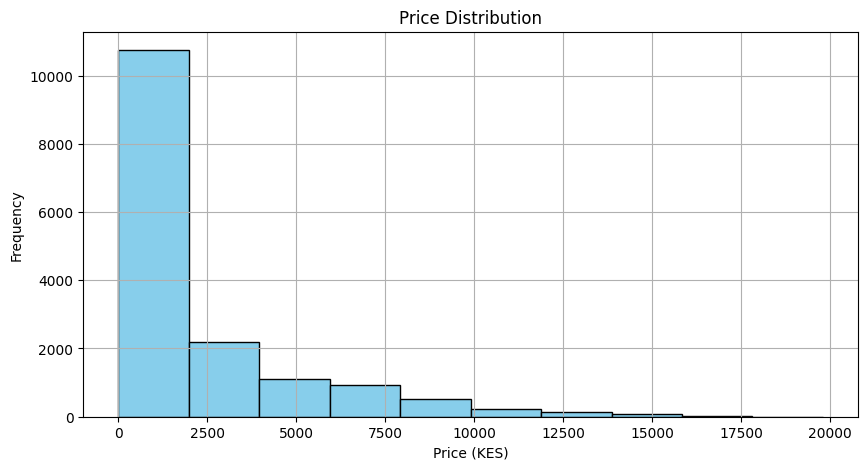

In [34]:
# Creating a price distribution
plt.figure(figsize=(10, 5))
plt.hist(merged_df['price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price (KES)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(True)
plt.show()

**Inflation rate**
The "inflation rate" in the provided dataset represents the percentage increase in the general price level of goods and services over time. It is a measure of the rate at which the cost of living or the purchasing power of a currency is changing. In this dataset, the inflation rate varies from a minimum of 1.85% to a maximum of 19.72%, with an average inflation rate of approximately 7.0%.

Summary Statistics:
count    225.000000
mean       7.590844
std        3.995578
min        1.850000
25%        5.000000
50%        6.410000
75%        8.440000
max       19.720000
Name: inflation rate, dtype: float64
**************************************************


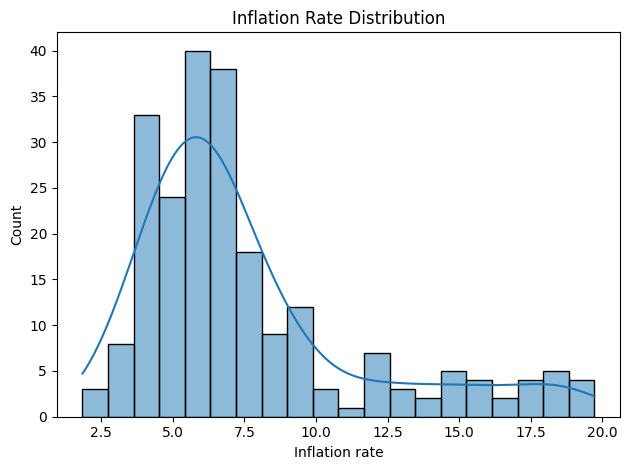

In [35]:
# Summary statistics
summary_stats = inflation_df[ 'inflation rate'].describe()
print("Summary Statistics:")
print(summary_stats)
print("*" * 50)

sns.histplot(inflation_df['inflation rate'], bins=20, kde=True)
plt.title("Inflation Rate Distribution")
plt.xlabel("Inflation rate")

plt.tight_layout()
plt.show()

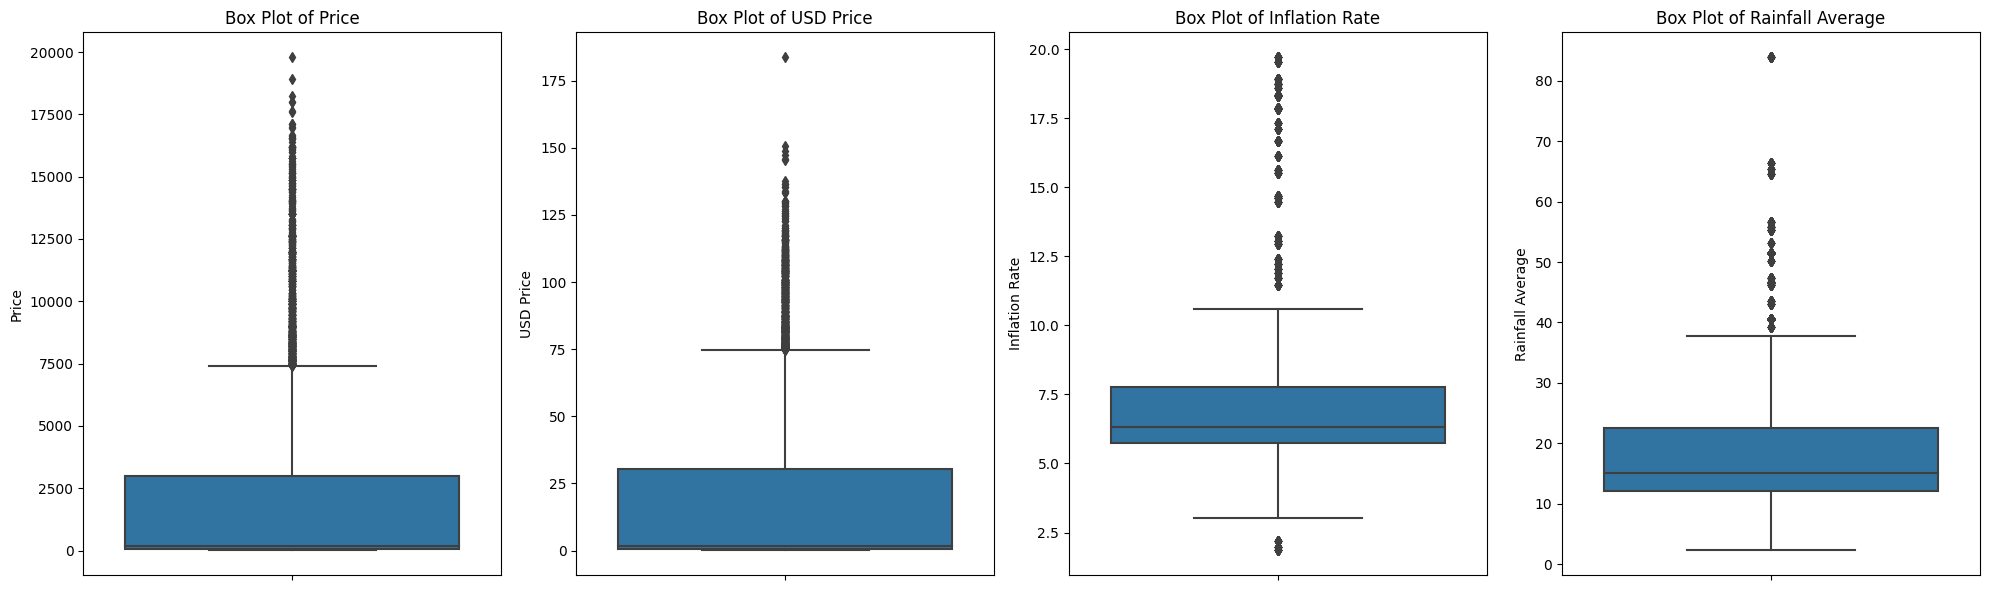

In [36]:
# Outlier Detection

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Plot box plots for each variable
sns.boxplot(y=merged_df['price'], ax=axes[0])
axes[0].set_ylabel('Price')
axes[0].set_title('Box Plot of Price')

sns.boxplot(y=merged_df['usdprice'], ax=axes[1])
axes[1].set_ylabel('USD Price')
axes[1].set_title('Box Plot of USD Price')

sns.boxplot(y=merged_df['inflation rate'], ax=axes[2])
axes[2].set_ylabel('Inflation Rate')
axes[2].set_title('Box Plot of Inflation Rate')

sns.boxplot(y=merged_df['rainfall_avg'], ax=axes[3])
axes[3].set_ylabel('Rainfall Average')
axes[3].set_title('Box Plot of Rainfall Average')

plt.tight_layout()
plt.show()


The price in KES, USD price, Inflation rate and Average rainfall columns appear to have outliers which will be dealt with accordingly

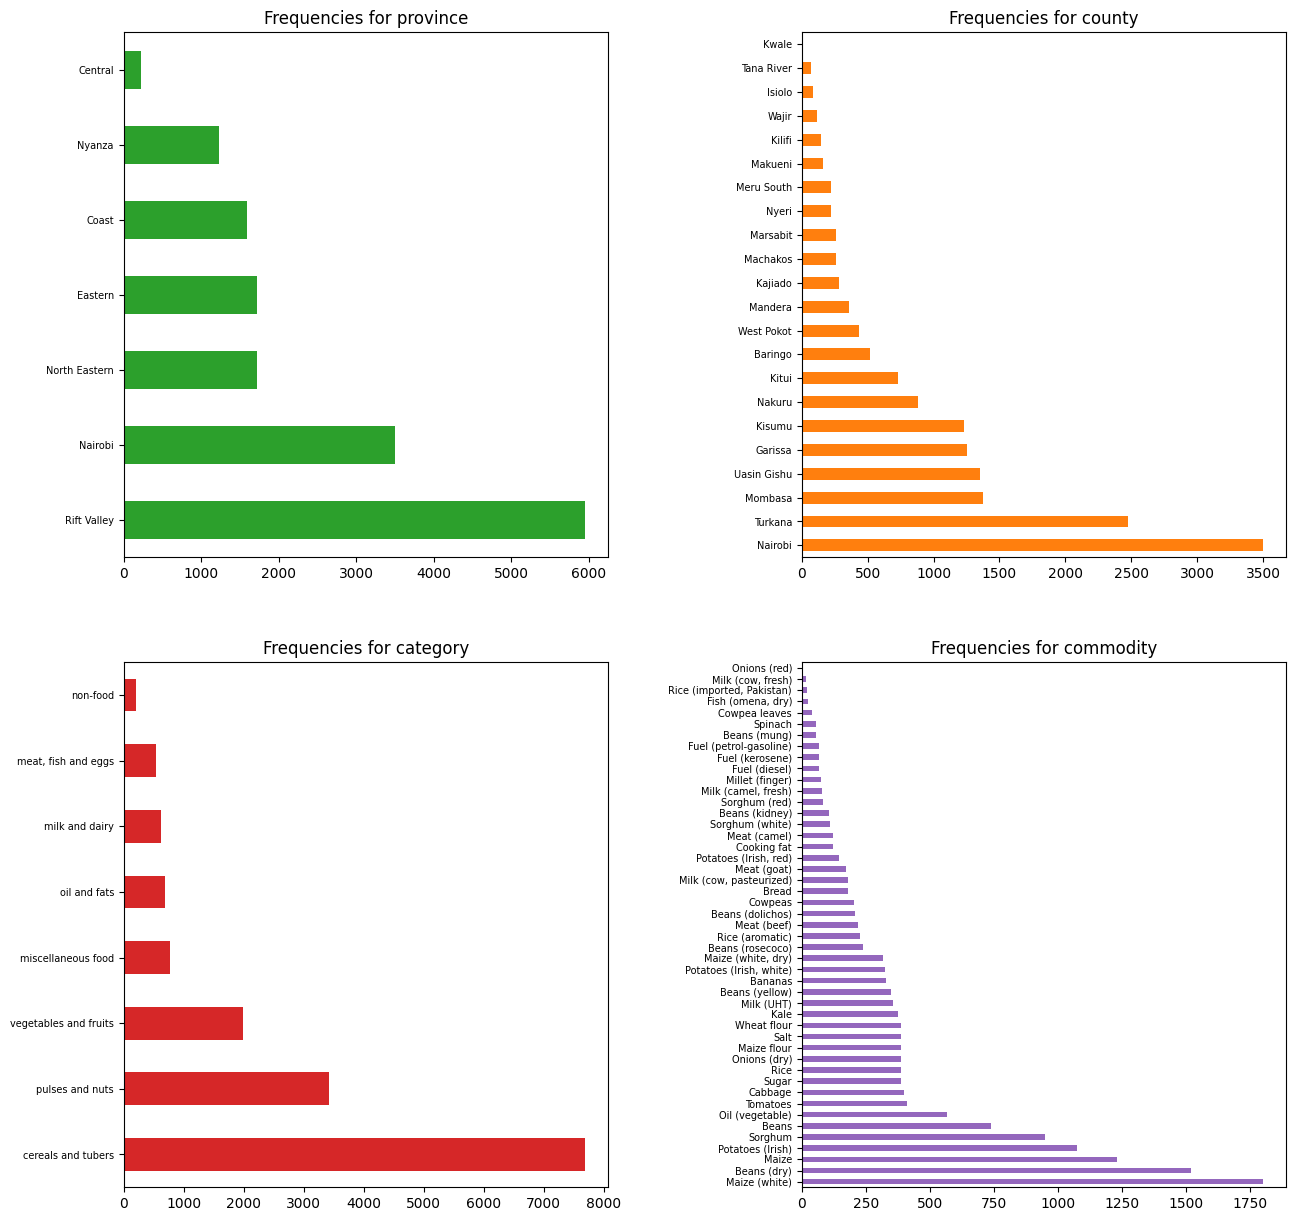

In [37]:
# Calculate frequencies for each categorical column
province_counts = merged_df['province'].value_counts()
county_counts = merged_df['county'].value_counts()
category_counts = merged_df['category'].value_counts()
commodity_counts = merged_df['commodity'].value_counts()

# Plot bar graphs for each categorical column
# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.2)  # Adjust spacing between subplots

# Plot bar graphs for each categorical column with custom colors
province_counts.plot(kind='barh', ax=axes[0, 0], color=colors[2], title='Frequencies for province')
county_counts.plot(kind='barh', ax=axes[0, 1], color=colors[1], title='Frequencies for county')
category_counts.plot(kind='barh', ax=axes[1, 0], color=colors[3], title='Frequencies for category')
commodity_counts.plot(kind='barh', ax=axes[1, 1], color=colors[4], title='Frequencies for commodity')

# Reduce font size on the x-axis tick labels
for ax in axes.flatten():
    ax.tick_params(axis='y', labelsize=7)  # Adjust the labelsize as needed


# Show the plots
plt.show()


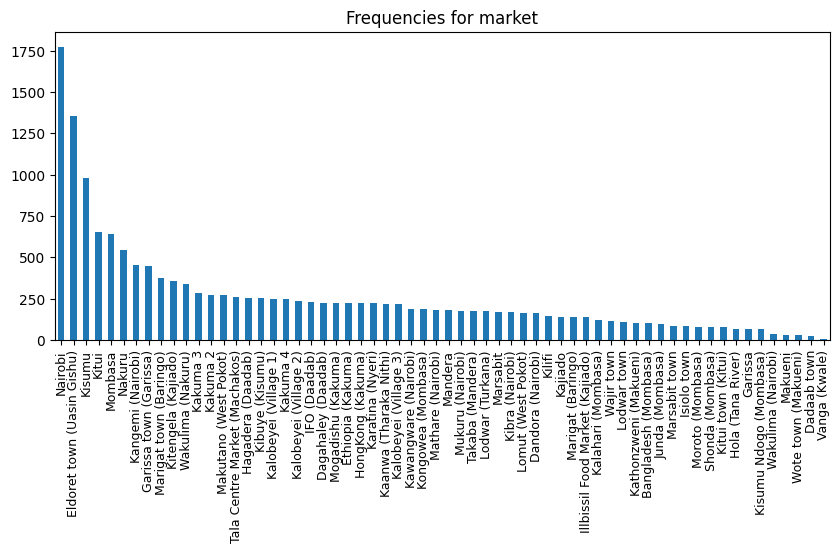

In [38]:
market_counts = merged_df['market'].value_counts()

plt.figure(figsize=(10, 4))
market_counts.plot(kind='bar', title='Frequencies for market')
plt.xticks(fontsize=9)

plt.show()

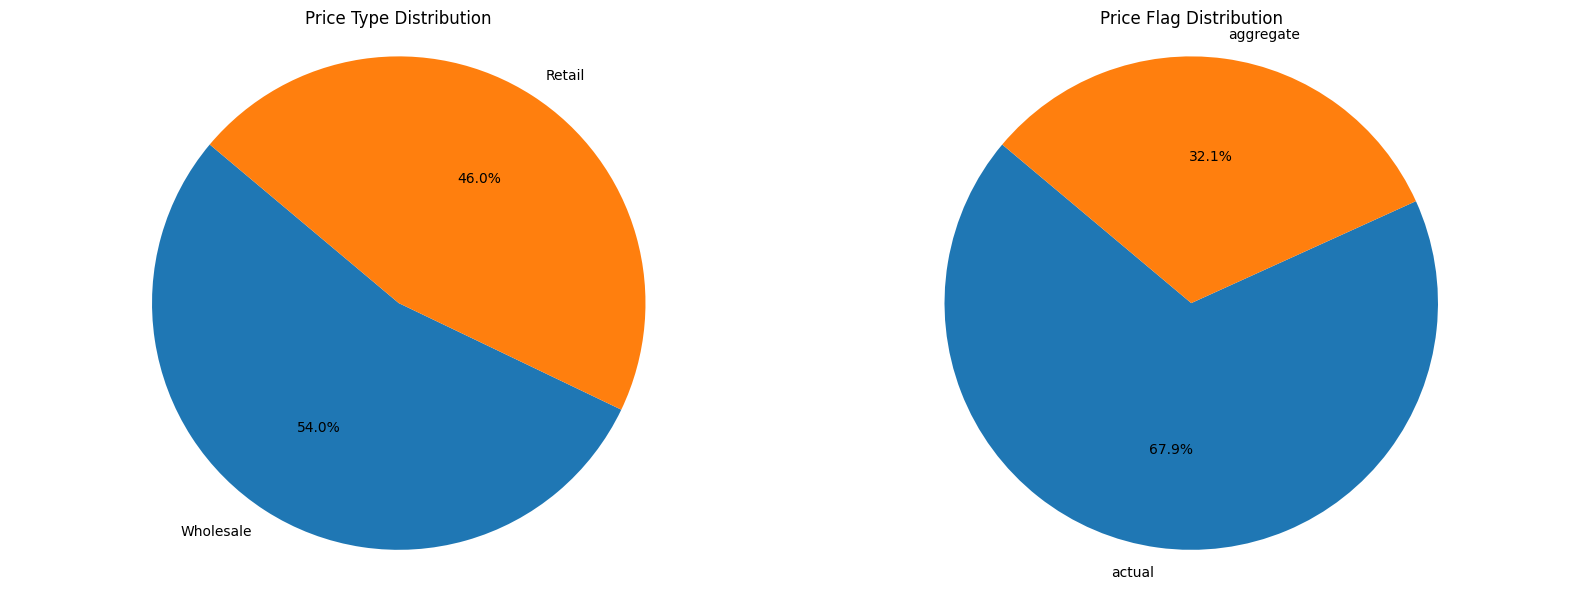

In [39]:
# Calculate and plot Price Type Distribution
price_type_counts = merged_df['pricetype'].value_counts()
labels = price_type_counts.index
sizes = price_type_counts.values

plt.figure(figsize=(16, 6))  # Increase the figure size to accommodate both plots

# Plot the first pie chart
plt.subplot(1, 2, 1)  # Create the first subplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Price Type Distribution')

# Calculate and plot Price Flag Distribution
price_flag_counts = merged_df['priceflag'].value_counts()
labels = price_flag_counts.index
sizes = price_flag_counts.values

# Plot the second pie chart
plt.subplot(1, 2, 2)  # Create the second subplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Price Flag Distribution')

plt.tight_layout()  # Ensure that the plots do not overlap
plt.show()

- The most frequent provinces in the dataset are RiftValley, Nairobi and
North Eastern
- Counties that appear frequently are Nairobi, Turkana, Uasin Gishu, Garissa and Mombasa
- Frequent categories are cereals and tubers, pulses and nuts as well as vegetables and fruits
- Specific commodities frequent in the dataset include maize, beans, potatoes and soghurm
- Frequent markets are Nairobi, Eldoret, Kisumu, Kitui, Mombasa and Nakuru



#### Bivariate Analysis
Here we examined the relationships between two variables. We did bivariate visualization where we created various plots and visualizations to explore relationships.

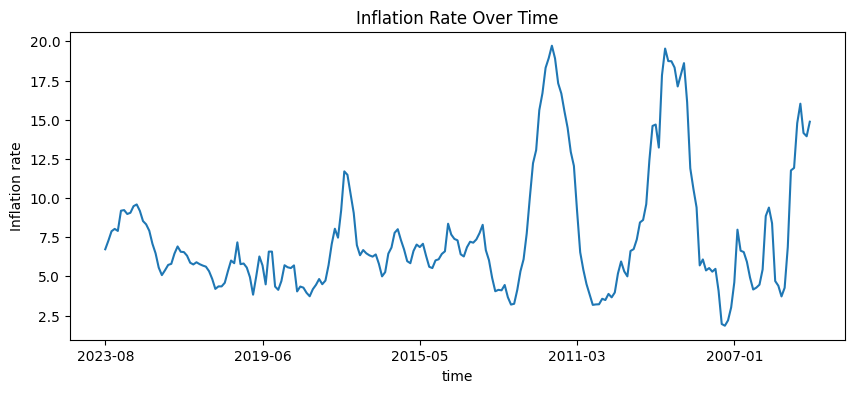

In [40]:
# Line plot for trends in Inflation rates over time

plt.figure(figsize=(10, 4))
inflation_df['inflation rate'].plot()
plt.title("Inflation Rate Over Time")
plt.xlabel("time")
plt.ylabel("Inflation rate")
plt.show()

Inflation rates appear to stabilize between 2013 to date, compared to the years prior, which illustrated large differences between the highest and lowest inflation rates. As a result, inflation rates are more predictable in recent years compared to the earlier years.

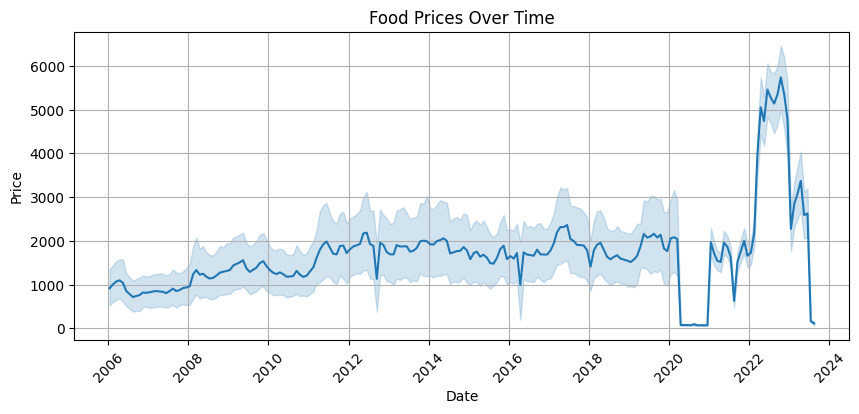

In [41]:
# Line plot for trends in price over time
plt.figure(figsize=(10, 4))
sns.lineplot(data=merged_df, x='date', y='price')
plt.title('Food Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

From the chart, there has been a increase in price over time. The graph also enabled us see the gaps in our dataset where in 2021 there was missing data which will be imputed in a later section.

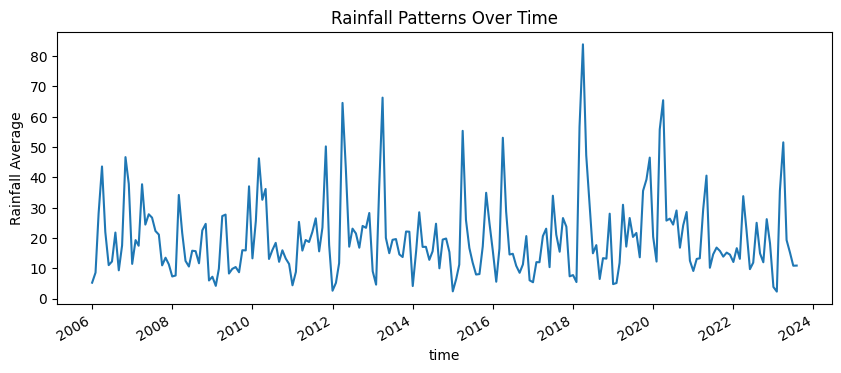

In [42]:
# Line plot for trends in Rainfall Average over time

plt.figure(figsize=(10, 4))
merged_df['rainfall_avg'].plot()
plt.title("Rainfall Patterns Over Time")
plt.xlabel("time")
plt.ylabel("Rainfall Average")
plt.show()

The rainfall graph shows that there has been a lot of variability in rainfall from year to year. The period between 2018-2019 seems to have had alot of rainfall while in 2014 - 2015 the rainfall averages were low. It is also evident that there are two rainy seasons in a year

We proceeded to examine the correlation between food category and provinces, which is crucial to understanding which food items/categories are more prevalent in which regions.

<Figure size 1600x1200 with 0 Axes>

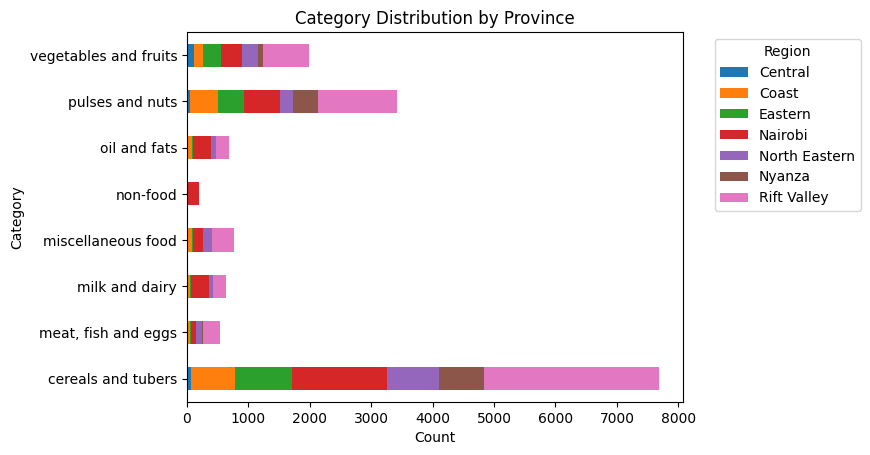

In [43]:
# Food Category vs Province
category_region_counts = merged_df.groupby(['category', 'province']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 12))
category_region_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Distribution by Province')
plt.xticks(rotation=0)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the chart, it becomes apparent that the food categories "cereals and tubers" are prevalent across a wide range of provinces, including Rift Valley, Nyanza, North Eastern, Nairobi, Eastern, Coast, and Central. Following closely in terms of prevalence are "pulses and nuts," followed by "vegetables and fruits." Conversely, the remaining food categories exhibit lower frequency in various regions. These two prominent categories, cereals and tubers, and pulses and nuts, hold significant importance in unraveling the intricacies of living costs and the enduring impact of inflation over time.

The representations presented above can also be effectively visualized using a heatmap, as illustrated below

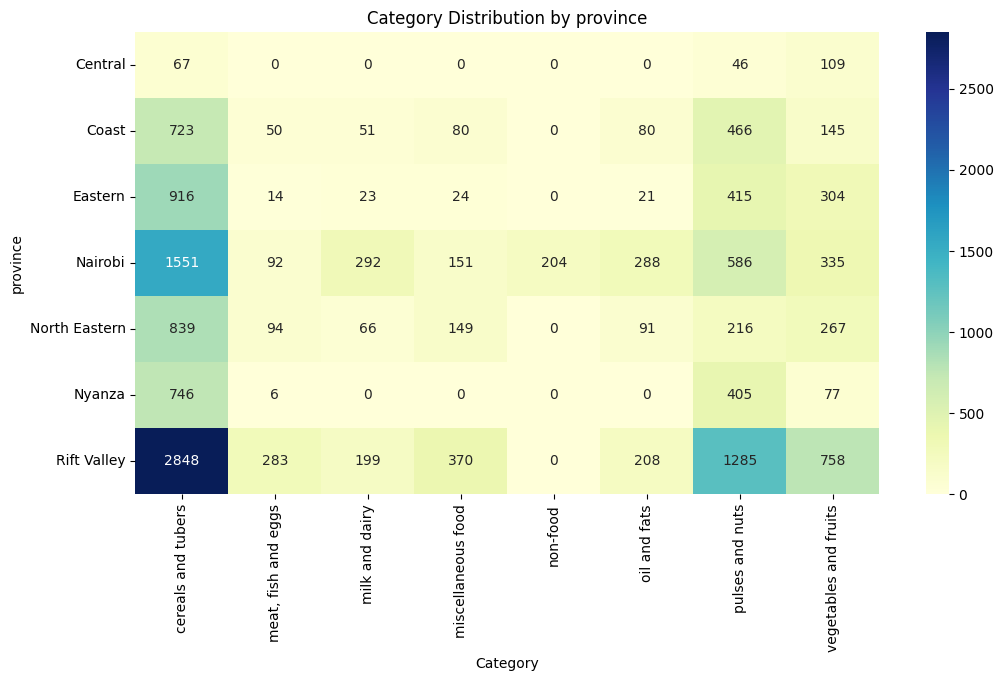

In [44]:
# Group the data by 'region' and 'category' and count occurrences
category_by_region = merged_df.groupby(['province', 'category']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
sns.heatmap(category_by_region, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Category')
plt.ylabel('province')
plt.title('Category Distribution by province')
plt.show()

Similar to the horizontal bar chart mentioned earlier, this heatmap highlights a high frequency of the "cereals and tubers" and "pulses and nuts" food category in the Rift Valley region, with Nairobi following closely. Additionally, it indicates a significant presence all food categories in regions like Nairobi. These findings enable us to focus on the most noteworthy food categories for further analysis.

The chart is a heatmap that visualizes the relationship between provinces and counties based on the frequency of occurrences in the dataset.

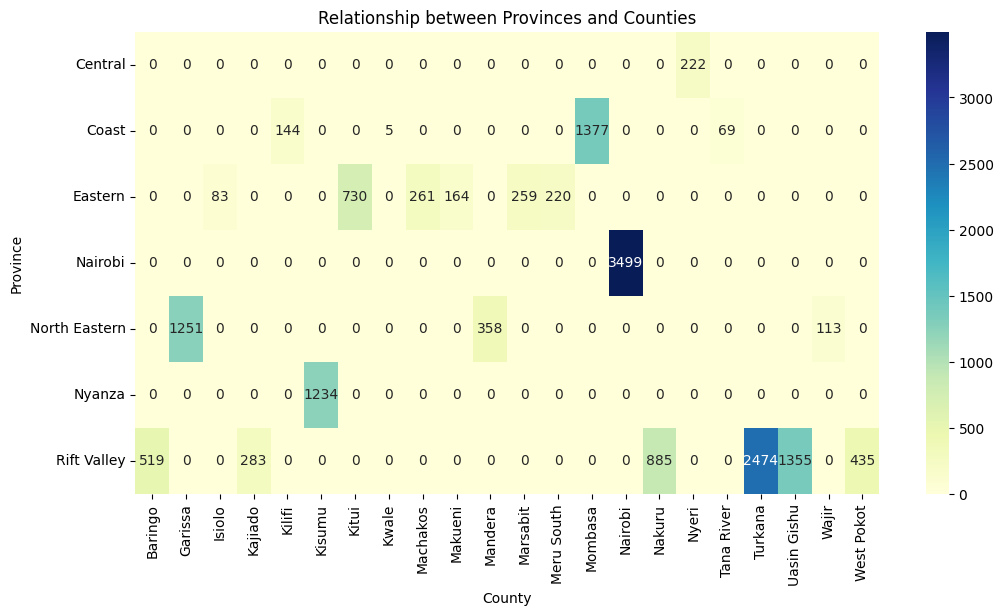

In [45]:
cross_tab = pd.crosstab(merged_df['province'], merged_df['county'])

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('County')
plt.ylabel('Province')
plt.title('Relationship between Provinces and Counties')
plt.show()

From the heatmap, it's apparent which provinces have a higher concentration of specific counties. This visualization allows for a quick understanding of how counties are distributed across provinces in the dataset, providing insights into regional patterns and relationships.

We also checked and compared the mean prices of different product categories

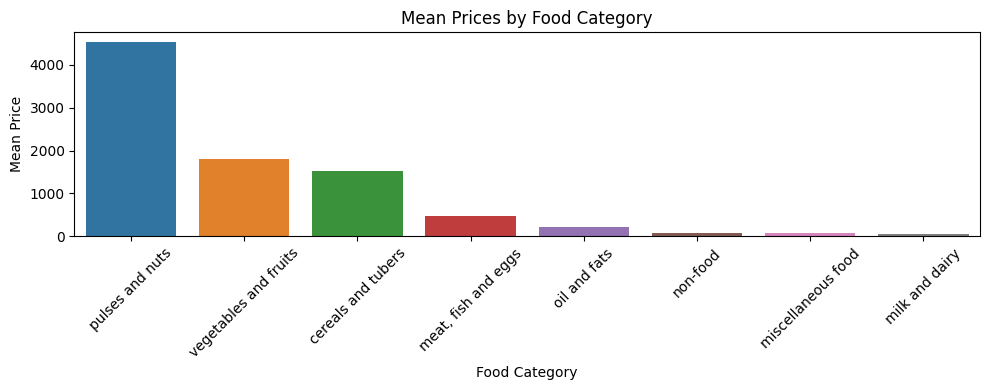

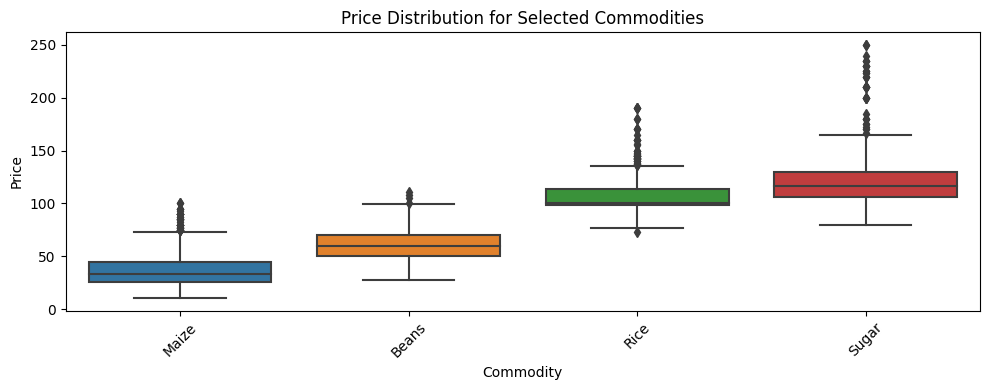

In [46]:
# Summary Statistics for Food Categories
category_summary = merged_df.groupby('category')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
category_summary = category_summary.sort_values(by='mean', ascending=False)

# Summary Statistics for Commodities
commodity_summary = merged_df.groupby('commodity')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
commodity_summary = commodity_summary.sort_values(by='mean', ascending=False)

# Plotting Mean Prices by Food Category
plt.figure(figsize=(10, 4))
sns.barplot(data=category_summary, x='category', y='mean')
plt.xlabel('Food Category')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Food Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Box Plots for Selected Commodities
selected_commodities = ['Maize', 'Beans', 'Rice', 'Sugar', 'Wheat']
selected_data = merged_df[merged_df['commodity'].isin(selected_commodities)]

plt.figure(figsize=(10, 4))
sns.boxplot(data=selected_data, x='commodity', y='price')
plt.xlabel('Commodity')
plt.ylabel('Price')
plt.title('Price Distribution for Selected Commodities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The initial visualization reveals that "pulses and nuts" had the highest mean prices, followed by "vegetables and fruits," "cereals and tubers," and "meat, fish, and eggs," among others.

When examining individual food commodities, sugar was found to have a relatively high price, followed by rice. Notably, both sugar and rice exhibited a greater number of outliers compared to other commodities. On the contrary, maize had the lowest price, with beans following closely.

It's worth noting that forecasting prices for sugar and rice may be more challenging due to the presence of these outliers compared to beans.

#### Multivariate Analysis
Here we examined the relationships between multiple variables in the dataset simultaneously

We first examined and visualized the average price (KES) for different categories across different provinces to get a better understanding of food product costs in different regions

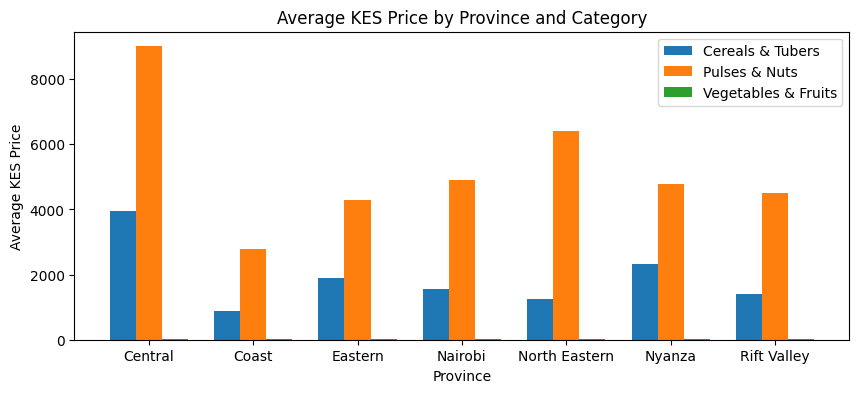

In [47]:
# Group the data by province and category and calculate the average USD price
grouped_data = merged_df.groupby(['province', 'category'])['price'].mean().reset_index()

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='province', columns='category', values='price')

# Create a new row for "Vegetables and Fruits" with values for all provinces
vegetables_fruits_values = [15.00] * len(pivot_data)
pivot_data['vegetables and fruits'] = vegetables_fruits_values

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 4))
bar_width = 0.25
index = np.arange(len(pivot_data))

bar1 = ax.bar(index, pivot_data['cereals and tubers'], bar_width, label='Cereals & Tubers')
bar2 = ax.bar(index + bar_width, pivot_data['pulses and nuts'], bar_width, label='Pulses & Nuts')
bar3 = ax.bar(index + 2 * bar_width, pivot_data['vegetables and fruits'], bar_width, label='Vegetables & Fruits')

ax.set_xlabel('Province')
ax.set_ylabel('Average KES Price')
ax.set_title('Average KES Price by Province and Category')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pivot_data.index)
ax.legend()

plt.show()


 "pulses and nuts" tend to have higher prices compared to the other food categories across different regions.

Crop Price Trends Over Time

<Figure size 1200x800 with 0 Axes>

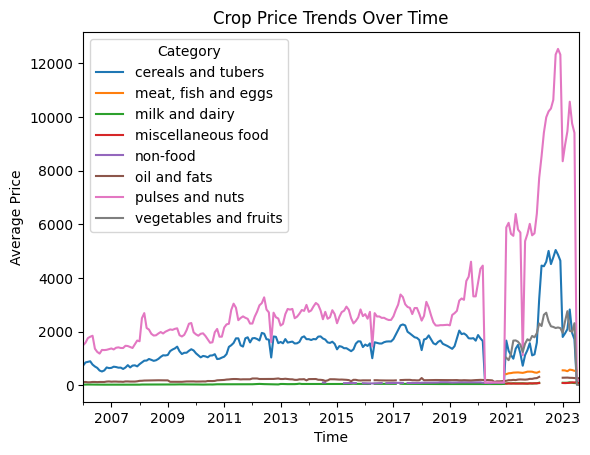

In [48]:
# Grouping data by time and category
time_category_prices = merged_df.groupby(['time', 'category'])['price'].mean().unstack()

# Plotting trends over time
plt.figure(figsize=(12, 8))
time_category_prices.plot(title='Crop Price Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.legend(title='Category')
plt.show();

Over the years, there has been a noticeable upward trend in the prices of pulses and nuts, as well as cereals and tubers, whereas the prices for other categories such as milk and dairy have remained relatively stable.

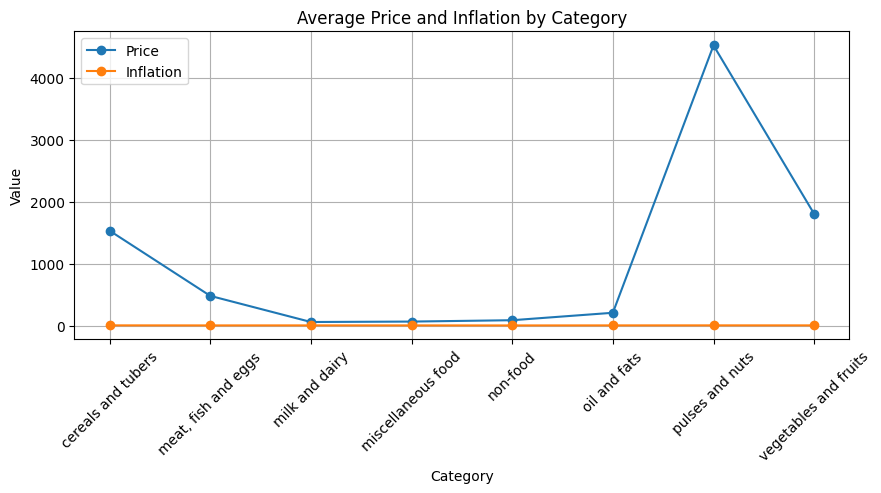

In [49]:
# Group the data by category and calculate the average price and inflation
grouped_data = merged_df.groupby('category')[['price', 'inflation rate']].mean().reset_index()

# Create a line graph
plt.figure(figsize=(10, 4))
plt.plot(grouped_data['category'], grouped_data['price'], marker='o', linestyle='-', label='Price')
plt.plot(grouped_data['category'], grouped_data['inflation rate'], marker='o', linestyle='-', label='Inflation')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Average Price and Inflation by Category')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Scatter Plots

We created scatter plots to visualize the relationship between two continuous variables "latitude" and "longitude"

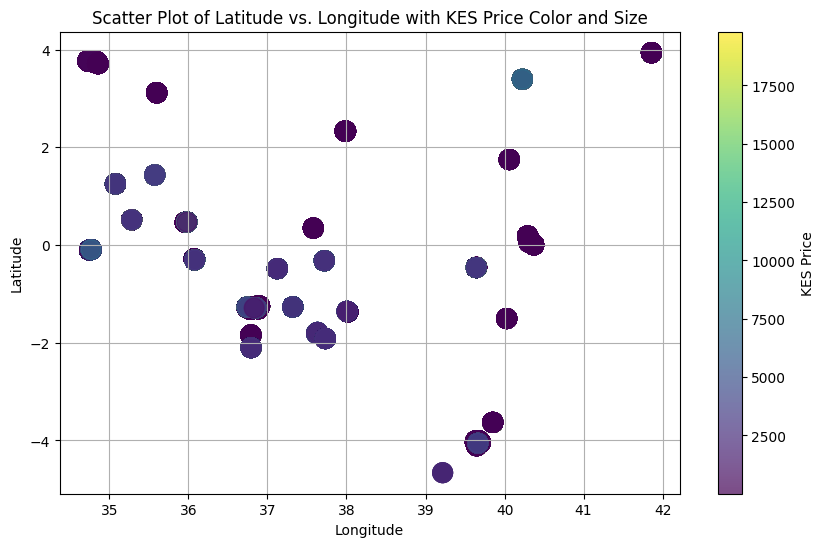

In [50]:
# Scatter plot indicating price in KES

# Extract the relevant data
latitude = merged_df['latitude']
longitude = merged_df['longitude']
KES_price = merged_df['price']

# Create a scatter plot with color and size differentiation
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=KES_price, s=200, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Latitude vs. Longitude with KES Price Color and Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='KES Price')
plt.grid(True)
plt.show()

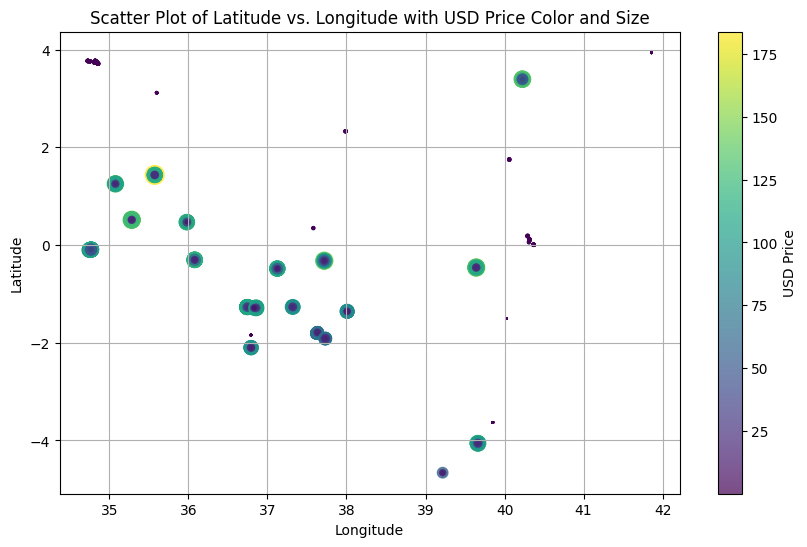

In [51]:
# Scatter plot indicating price in USD

# Extract the relevant data
latitude = merged_df['latitude']
longitude = merged_df['longitude']
usd_price = merged_df['usdprice']

# Create a scatter plot with color and size differentiation
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=usd_price, s=usd_price, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Latitude vs. Longitude with USD Price Color and Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='USD Price')
plt.grid(True)
plt.show()

Interpretation:

- Clusters of points with similar colors and sizes can indicate regions with similar price levels.
- Variations in color and size across the plot suggest spatial differences in food prices. For example, you may observe regions with higher-priced or lower-priced food commodities.
- Outliers, represented as individual data points with distinct colors and sizes, may highlight areas with significantly different price levels compared to their surroundings.

Overall, this scatter plot offers a visual representation of how food prices are distributed across different geographical coordinates, enabling you to identify spatial patterns and trends in the dataset.

Correlation Analysis: We calculated the correlation coefficient to measure the strength and direction of the linear relationship between continuous variables

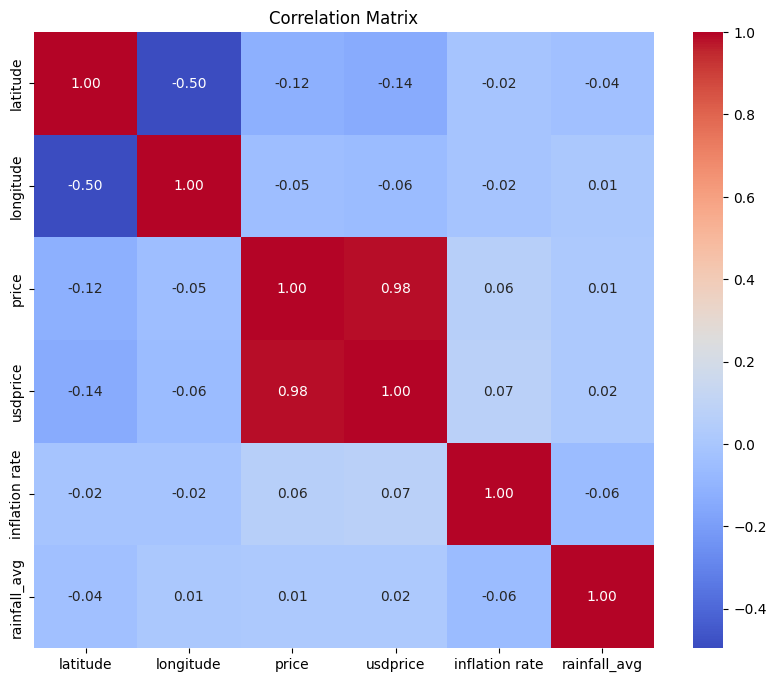

In [52]:
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

USD price and price in KES are the variables with the highest correlation of 0.98.


### 3.3 Feature Engineering


1.   Create a feature to represent the seasons (wet and dry) based on the rainfall averages.
2.   Cluster Analysis: Creating clusters based on regions
3. Feature selection based on importance



Seasons

In [53]:
# Define the season_type function
def season_type(rainfall_avg, wet_threshold=50.0, dry_threshold=20.0):
    if rainfall_avg >= wet_threshold:
        return 'Wet'
    elif rainfall_avg <= dry_threshold:
        return 'Dry'
    else:
        return 'Intermediate'

# Apply the season_type function to create a 'season' column
merged_df['season'] = merged_df['rainfall_avg'].apply(season_type)

# Print the updated DataFrame
merged_df.head()


,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season
time,,,,,,,,,,,,,,,,,
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,8.39,5.2364,Dry
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041,8.39,5.2364,Dry
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,8.39,5.2364,Dry
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705,8.39,5.2364,Dry
2006-01-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,8.39,5.2364,Dry


In [54]:
merged_df['season'].value_counts()

Dry             11232
Intermediate     4210
Wet               498
Name: season, dtype: int64

We determine the type of season (wet or dry) based on the average rainfall;
- Wet: if the rainfall_avg is above the wet_threshold
- Dry: if it's below the dry_threshold
- Intermediate: if it falls in between

This classification is based on the fact that most crops in Kenya require at least 50 mm of rainfall per month in order to grow properly. Months with less than 20 mm of rainfall are often considered dry or arid. Therefore, a month with less than 20 mm of rainfall is likely to be too dry for most crops to grow, and is therefore considered to be a dry month.

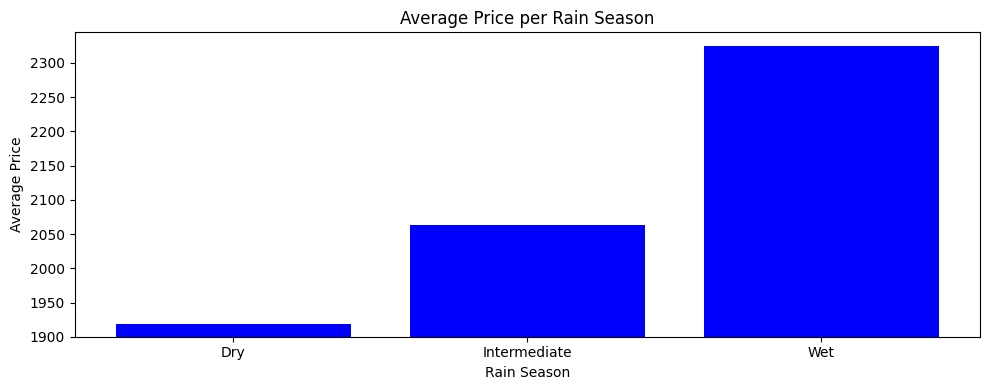

In [55]:
# create a bar graph to visualize the average price per rain season

# Group by 'rain_season' and calculate the mean price
rain_season_prices = merged_df.groupby('season')['price'].mean()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Plot for rain season
ax.bar(rain_season_prices.index, rain_season_prices.values, color='blue')
ax.set_title('Average Price per Rain Season')
ax.set_xlabel('Rain Season')
ax.set_ylabel('Average Price')
ax.set_ylim(1900, max(rain_season_prices.values) + 20)  # Set the y-axis limit

plt.tight_layout()
plt.show()



The price of commodities is higher during the wet seasons

Cluster Analysis

Segment regions based on crops and prices

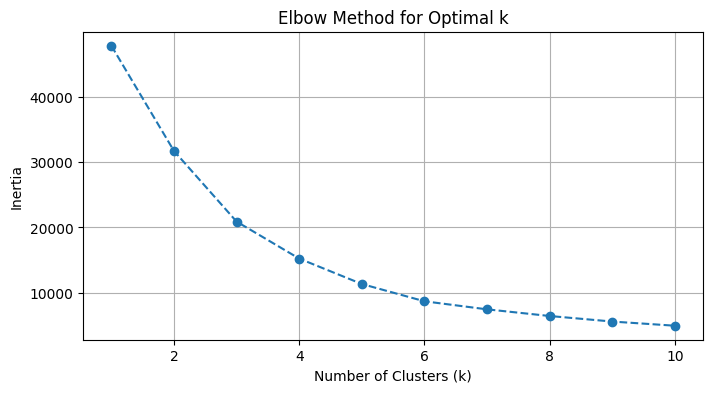

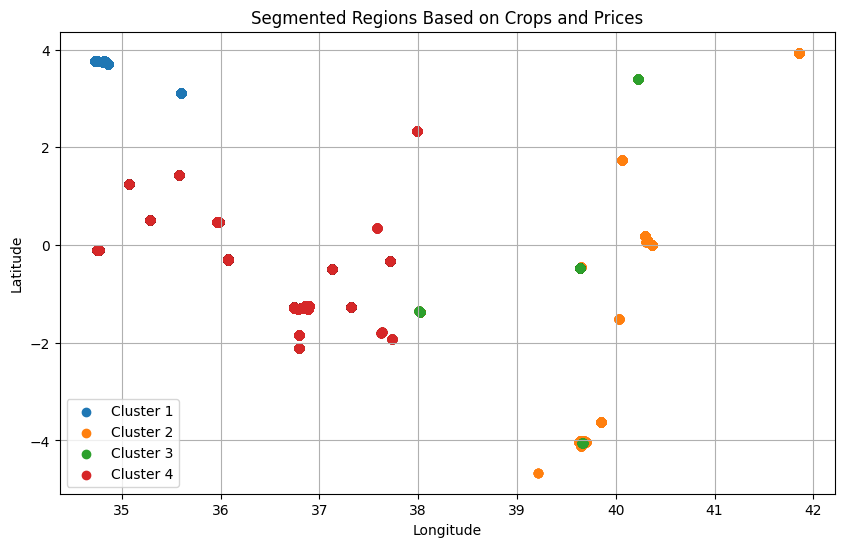

In [56]:
# Extract relevant features (e.g., latitude, longitude, and price) for clustering
features = merged_df[['latitude', 'longitude', 'price']]

# Normalize the features to ensure equal weight in clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to help choose the number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., k=4)
optimal_k = 4

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataset
merged_df['cluster'] = clusters

# Visualize the results on a scatter plot (latitude vs. longitude)
plt.figure(figsize=(10, 6))
for cluster_num in range(optimal_k):
    cluster_data = merged_df[merged_df['cluster'] == cluster_num]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Segmented Regions Based on Crops and Prices')
plt.legend()
plt.grid(True)
plt.show()

# Now, 'merged_df' contains the cluster labels for each region based on crops and prices


In [57]:
import folium
from folium import plugins

# Create a map centered around Kenya
m = folium.Map(location=[0.0236, 37.9062], zoom_start=6)

# Add heatmaps based on latitude and longitude
heat_data = [[row['latitude'], row['longitude']] for _, row in merged_df.iterrows()]
plugins.HeatMap(heat_data).add_to(m)

# Display the map
m.save('food_prices_heatmap.html')

[Kenya food prices heatmap ](https://colab.research.google.com/drive/1GJVle5e-ZaJz9WZh0l2100CSlvXt6Pbc#scrollTo=n9ApWH98jkyX&line=1&uniqifier=1)

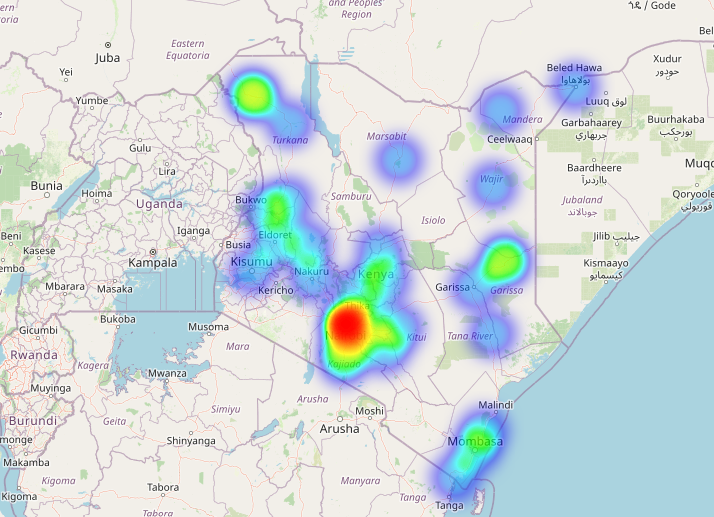

The heatmap represents the density or concentration of data points with latitude and longitude coordinates on the map.
Areas with a higher concentration of data points will appear "hotter" (more intense) in color, while areas with fewer data points will appear "cooler" (less intense) in color.

In [58]:
import folium

# Create a map centered around Kenya
m = folium.Map(location=[0.0236, 37.9062], zoom_start=6)

# Define colors for the clusters
colors = ['red', 'blue', 'green', 'purple']

# Assuming 'cluster_label' is the correct column for cluster labels
for cluster_num in range(4):  # Assuming you have 4 clusters
    cluster_df = merged_df[merged_df['cluster'] == cluster_num]

    for _, row in cluster_df.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=colors[cluster_num],
            fill=True,
            fill_color=colors[cluster_num],
            fill_opacity=0.7,
            popup=f'Cluster {cluster_num}',
        ).add_to(m)

# Display the map
m.save('clustered_map.html')

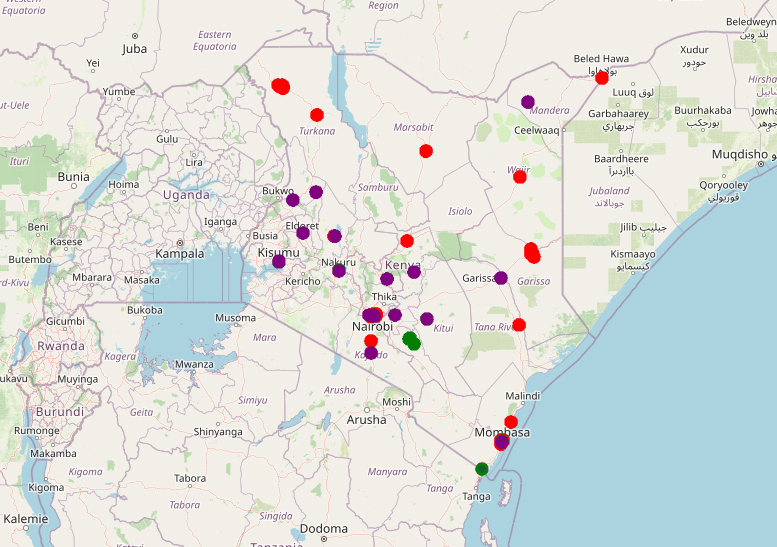

#### Feature Selection
1. Exploring  underlying factors in the  the data through factor analysis to determine features more important in predicting price
2. Selecting the specific commodities to proceed with based on frequency in the dataset and commonality in a standard kenyan household


*Factor Analysis:* focused on identifying underlying factors or latent variables that explained the patterns in the data. This helped uncover hidden relationships among variables.

In [59]:
from sklearn.decomposition import FactorAnalysis

# Select relevant numerical columns for factor analysis
numerical_columns = ['latitude', 'longitude', 'price', 'usdprice', 'inflation rate']
data_for_factor_analysis = merged_df[numerical_columns]

# Apply Factor Analysis
fa = FactorAnalysis(n_components=3)
fa_result = fa.fit_transform(data_for_factor_analysis)

# Visualize the factor loadings
loadings = fa.components_
loadings_df = pd.DataFrame(loadings, columns=numerical_columns)
print("Factor Loadings:")
print(loadings_df)

Factor Loadings:
   latitude  longitude        price   usdprice  inflation rate
0 -0.262406  -0.090503  2996.570038  26.861465        0.175960
1 -0.273578  -0.152095    -0.041225   4.640439        0.314915
2  0.016616  -0.006324     0.001419  -0.176909        2.591869


Factor loadings indicate the strength and direction of the relationships between the observed variables (latitude, longitude, price, usdprice, and inflation rate) extracted by the factor analysis.
- Factor 0: Latitude has a moderate negative loading (-0.2624) on this factor. Longitude has a small negative loading (-0.0905) on this factor. Price has a strong positive loading (2996.5700) on this factor. USD price has a moderate positive loading (26.8615) on this factor. Inflation rate has a small positive loading (0.1759) on this factor.
 - Interpretation: This factor appears to be related to the price and USD price of products, with a potential geographical component (latitude and longitude). It suggests that prices tend to be higher in areas associated with higher latitude and longitude values.
- Factor 1: Latitude has a moderate negative loading (-0.2736) on this factor. Longitude has a moderate negative loading (-0.1521) on this factor. Price has a very small negative loading (-0.0412) on this factor. USD price has a small positive loading (4.6404) on this factor. Inflation rate has a moderate positive loading (0.3149) on this factor.
 - Interpretation: This factor seems to represent a combination of latitude, longitude, and inflation rate. It suggests that regions with lower latitude and longitude values are associated with lower inflation rates and slightly lower USD prices.

- Factor 2: Latitude has a very small positive loading (0.0166) on this factor. Longitude has a small negative loading (-0.0063) on this factor. Price has a very small positive loading (0.0014) on this factor. USD price has a moderate negative loading (-0.1769) on this factor. Inflation rate has a very strong positive loading (2.5919) on this factor.
 - Interpretation: This factor appears to be primarily driven by the inflation rate. It suggests that areas with higher inflation rates are associated with lower USD prices and have a minor geographical component with latitude and longitude.

*Selecting Specific Commodities*

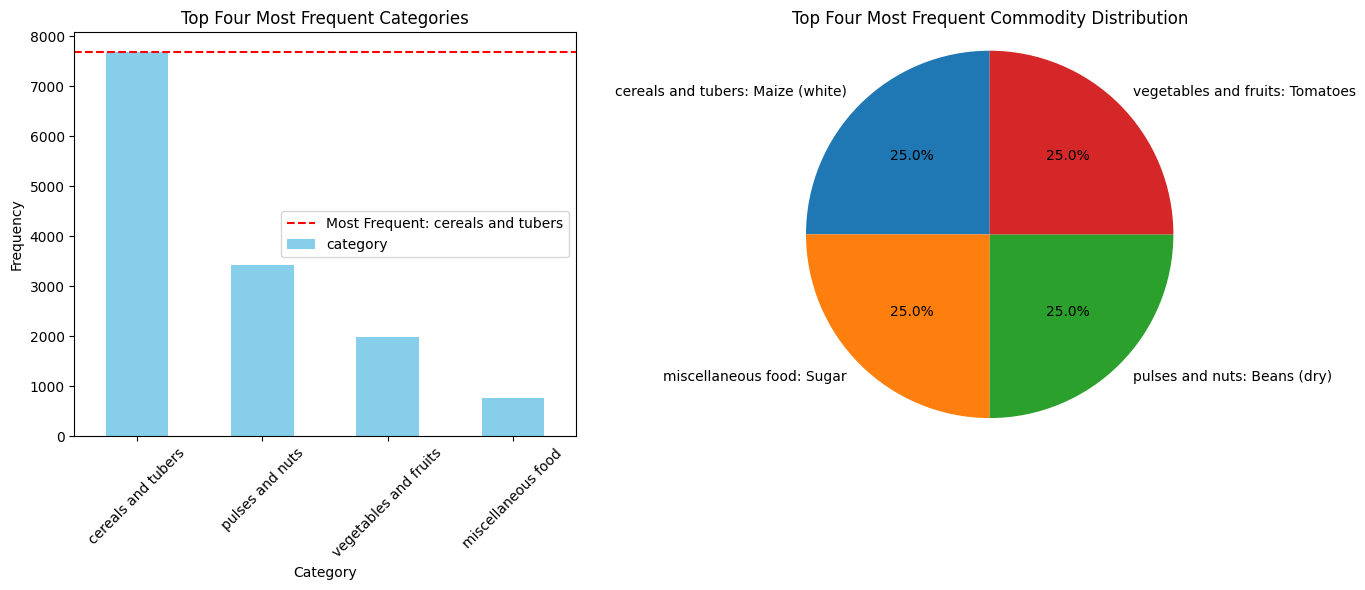

In [60]:
# Selecting Top four commodities to predict price on based on frequency

# Count the occurrences of each category
category_counts = merged_df['category'].value_counts()

# Select the top four most frequent categories
top_four_categories = category_counts.head(4).index

# Find the most frequent category (for highlighting)
most_frequent_category = category_counts.idxmax()

# Group by 'category' and find the most frequent commodity within each group
most_frequent_commodities = merged_df.groupby('category')['commodity'].agg(lambda x: x.mode().iloc[0])

# Reset the index of the resulting Series
most_frequent_commodities = most_frequent_commodities.reset_index()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar graph of the top four most frequent categories on the left subplot
category_counts[top_four_categories].plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top Four Most Frequent Categories')
axes[0].set_xticklabels(top_four_categories, rotation=45)
axes[0].axhline(y=category_counts[most_frequent_category], color='red', linestyle='--', label=f'Most Frequent: {most_frequent_category}')
axes[0].legend()

# Plot the pie chart of the top four most frequent commodities on the right subplot
top_four_commodities = most_frequent_commodities[most_frequent_commodities['category'].isin(top_four_categories)]
axes[1].pie(top_four_commodities['commodity'].value_counts(), labels=top_four_commodities['category'] + ': ' + top_four_commodities['commodity'], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Top Four Most Frequent Commodity Distribution')

# Adjust the layout
plt.tight_layout()

# Show the combined figure
plt.show()



Maize

In [61]:
# Filter rows where the 'commodity' column contains the word "Maize"
maize_df = merged_df[merged_df['commodity'].str.contains('Maize', case=False, na=False)]

# Reset the index of the new DataFrame
maize_df.reset_index(drop=True, inplace=True)
maize_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,8.39,5.2364,Dry,1
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041,8.39,5.2364,Dry,1
2,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,8.39,5.2364,Dry,1
3,2006-01-15,Eastern,Marsabit,Marsabit,2.333333,37.983333,cereals and tubers,Maize (white),KG,actual,Retail,KES,21.00,0.2909,8.39,5.2364,Dry,3
4,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize,KG,actual,Wholesale,KES,15.48,0.2145,8.39,5.2364,Dry,3


In [62]:
# Split the 'unit' column into 'quantity' and 'unit' columns
maize_df[['quantity', 'unit']] = maize_df['unit'].str.split(n=1, expand=True)

# Convert the 'quantity' column to numeric (assuming it contains numerical values)
maize_df['quantity'] = pd.to_numeric(maize_df['quantity'], errors='coerce')

# Fill NaN values in 'quantity' with 1
maize_df['quantity'].fillna(1, inplace=True)

# Fill NaN values in 'unit' with 'KG'
maize_df['unit'].fillna('KG', inplace=True)

# Display the modified DataFrame
maize_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster,quantity
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,8.39,5.2364,Dry,1,1.0
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),KG,actual,Wholesale,KES,1480.00,20.5041,8.39,5.2364,Dry,1,90.0
2,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,8.39,5.2364,Dry,1,1.0
3,2006-01-15,Eastern,Marsabit,Marsabit,2.333333,37.983333,cereals and tubers,Maize (white),KG,actual,Retail,KES,21.00,0.2909,8.39,5.2364,Dry,3,1.0
4,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize,KG,actual,Wholesale,KES,15.48,0.2145,8.39,5.2364,Dry,3,1.0


In [63]:
# Calculate the price per unit and store it in a new column 'price_per_unit'
maize_df['price_per_unit'] = maize_df['price'] / maize_df['quantity']
maize_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster,quantity,price_per_unit
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,8.39,5.2364,Dry,1,1.0,16.130000
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),KG,actual,Wholesale,KES,1480.00,20.5041,8.39,5.2364,Dry,1,90.0,16.444444
2,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,8.39,5.2364,Dry,1,1.0,17.000000
3,2006-01-15,Eastern,Marsabit,Marsabit,2.333333,37.983333,cereals and tubers,Maize (white),KG,actual,Retail,KES,21.00,0.2909,8.39,5.2364,Dry,3,1.0,21.000000
4,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize,KG,actual,Wholesale,KES,15.48,0.2145,8.39,5.2364,Dry,3,1.0,15.480000


Beans

In [64]:
# Filter rows where the 'commodity' column contains the word "Beans"
beans_df = merged_df[merged_df['commodity'].str.contains('Beans', case=False, na=False)]

# Reset the index of the new DataFrame
beans_df.reset_index(drop=True, inplace=True)
beans_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,8.39,5.2364,Dry,1
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705,8.39,5.2364,Dry,1
2,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,KES,39.00,0.5403,8.39,5.2364,Dry,1
3,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,pulses and nuts,Beans,KG,actual,Wholesale,KES,42.31,0.5862,8.39,5.2364,Dry,3
4,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3175.00,43.9869,8.39,5.2364,Dry,3


In [65]:
# Split the 'unit' column into 'quantity' and 'unit' columns
beans_df[['quantity', 'unit']] = beans_df['unit'].str.split(n=1, expand=True)

# Convert the 'quantity' column to numeric (assuming it contains numerical values)
beans_df['quantity'] = pd.to_numeric(beans_df['quantity'], errors='coerce')

# Fill NaN values in 'quantity' with 1
beans_df['quantity'].fillna(1, inplace=True)

# Fill NaN values in 'unit' with 'KG'
beans_df['unit'].fillna('KG', inplace=True)

# Display the modified DataFrame
beans_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster,quantity
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,8.39,5.2364,Dry,1,1.0
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),KG,actual,Wholesale,KES,3246.00,44.9705,8.39,5.2364,Dry,1,90.0
2,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,KES,39.00,0.5403,8.39,5.2364,Dry,1,1.0
3,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,pulses and nuts,Beans,KG,actual,Wholesale,KES,42.31,0.5862,8.39,5.2364,Dry,3,1.0
4,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,pulses and nuts,Beans (dry),KG,actual,Wholesale,KES,3175.00,43.9869,8.39,5.2364,Dry,3,90.0


In [66]:
# Calculate the price per unit and store it in a new column 'price_per_unit'
beans_df['price_per_unit'] = beans_df['price'] / beans_df['quantity']
beans_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster,quantity,price_per_unit
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,8.39,5.2364,Dry,1,1.0,33.630000
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),KG,actual,Wholesale,KES,3246.00,44.9705,8.39,5.2364,Dry,1,90.0,36.066667
2,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,KES,39.00,0.5403,8.39,5.2364,Dry,1,1.0,39.000000
3,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,pulses and nuts,Beans,KG,actual,Wholesale,KES,42.31,0.5862,8.39,5.2364,Dry,3,1.0,42.310000
4,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,pulses and nuts,Beans (dry),KG,actual,Wholesale,KES,3175.00,43.9869,8.39,5.2364,Dry,3,90.0,35.277778


Tomatoes

In [67]:
# Filter rows where the 'commodity' column contains the word "Maize"
tomato_df = merged_df[merged_df['commodity'].str.contains('Tomatoes', case=False, na=False)]

# Reset the index of the new DataFrame
tomato_df.reset_index(drop=True, inplace=True)
tomato_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster
0,2020-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,vegetables and fruits,Tomatoes,KG,actual,Retail,KES,58.0,0.5373,4.36,29.061500,Intermediate,3
1,2021-01-15,Central,Nyeri,Karatina (Nyeri),-0.481700,37.125100,vegetables and fruits,Tomatoes,64 KG,actual,Wholesale,KES,2336.0,21.3528,5.69,9.100333,Dry,3
2,2021-01-15,Coast,Kwale,Vanga (Kwale),-4.659730,39.216700,vegetables and fruits,Tomatoes,64 KG,actual,Wholesale,KES,2502.0,22.8702,5.69,9.100333,Dry,1
3,2021-01-15,Eastern,Kitui,Kitui town (Kitui),-1.356570,38.008250,vegetables and fruits,Tomatoes,64 KG,actual,Wholesale,KES,2578.0,23.5649,5.69,9.100333,Dry,1
4,2021-01-15,Eastern,Makueni,Makueni,-1.806180,37.621370,vegetables and fruits,Tomatoes,64 KG,actual,Wholesale,KES,2816.0,25.7404,5.69,9.100333,Dry,3


In [68]:
# Fill 'None' values in the 'unit' column with 'KG'
tomato_df['unit'].fillna('KG', inplace=True)

# Split the 'unit' column into 'quantity' and 'unit' columns
tomato_df[['quantity', 'unit']] = tomato_df['unit'].str.split(n=1, expand=True)

# Convert the 'quantity' column to numeric (assuming it contains numerical values)
tomato_df['quantity'] = pd.to_numeric(tomato_df['quantity'], errors='coerce')

# Fill NaN values in 'quantity' with 1
tomato_df['quantity'].fillna(1, inplace=True)

# Fill NaN values in 'unit' with 'KG'
tomato_df['unit'].fillna('KG', inplace=True)

# Display the modified DataFrame
tomato_df.head()

# Calculate the price per unit and store it in a new column 'price_per_unit'
tomato_df['price_per_unit'] = tomato_df['price'] / tomato_df['quantity']
tomato_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster,quantity,price_per_unit
0,2020-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,vegetables and fruits,Tomatoes,KG,actual,Retail,KES,58.0,0.5373,4.36,29.061500,Intermediate,3,1.0,58.00000
1,2021-01-15,Central,Nyeri,Karatina (Nyeri),-0.481700,37.125100,vegetables and fruits,Tomatoes,KG,actual,Wholesale,KES,2336.0,21.3528,5.69,9.100333,Dry,3,64.0,36.50000
2,2021-01-15,Coast,Kwale,Vanga (Kwale),-4.659730,39.216700,vegetables and fruits,Tomatoes,KG,actual,Wholesale,KES,2502.0,22.8702,5.69,9.100333,Dry,1,64.0,39.09375
3,2021-01-15,Eastern,Kitui,Kitui town (Kitui),-1.356570,38.008250,vegetables and fruits,Tomatoes,KG,actual,Wholesale,KES,2578.0,23.5649,5.69,9.100333,Dry,1,64.0,40.28125
4,2021-01-15,Eastern,Makueni,Makueni,-1.806180,37.621370,vegetables and fruits,Tomatoes,KG,actual,Wholesale,KES,2816.0,25.7404,5.69,9.100333,Dry,3,64.0,44.00000


Sugar

In [69]:
# Filter rows where the 'commodity' column contains the word "Maize"
sugar_df = merged_df[merged_df['commodity'].str.contains('sugar', case=False, na=False)]

# Reset the index of the new DataFrame
sugar_df.reset_index(drop=True, inplace=True)
sugar_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster
0,2018-01-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Sugar,KG,aggregate,Retail,KES,120.00,1.1838,4.83,7.741133,Dry,1
1,2020-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,miscellaneous food,Sugar,KG,actual,Retail,KES,107.00,0.9912,4.36,29.061500,Intermediate,3
2,2021-01-15,Coast,Mombasa,Bangladesh (Mombasa),-4.011760,39.633460,miscellaneous food,Sugar,KG,aggregate,Retail,KES,116.67,1.0664,5.69,9.100333,Dry,1
3,2021-01-15,Coast,Mombasa,Kalahari (Mombasa),-4.031422,39.630539,miscellaneous food,Sugar,KG,aggregate,Retail,KES,113.33,1.0360,5.69,9.100333,Dry,1
4,2021-01-15,Coast,Mombasa,Shonda (Mombasa),-4.106583,39.646735,miscellaneous food,Sugar,KG,aggregate,Retail,KES,115.00,1.0512,5.69,9.100333,Dry,1


In [70]:
sugar_df['unit'].value_counts()

KG    388
Name: unit, dtype: int64

In [71]:
# Create a new 'quantity' column with a constant value of 1
sugar_df['quantity'] = 1
sugar_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation rate,rainfall_avg,season,cluster,quantity
0,2018-01-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Sugar,KG,aggregate,Retail,KES,120.00,1.1838,4.83,7.741133,Dry,1,1
1,2020-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,miscellaneous food,Sugar,KG,actual,Retail,KES,107.00,0.9912,4.36,29.061500,Intermediate,3,1
2,2021-01-15,Coast,Mombasa,Bangladesh (Mombasa),-4.011760,39.633460,miscellaneous food,Sugar,KG,aggregate,Retail,KES,116.67,1.0664,5.69,9.100333,Dry,1,1
3,2021-01-15,Coast,Mombasa,Kalahari (Mombasa),-4.031422,39.630539,miscellaneous food,Sugar,KG,aggregate,Retail,KES,113.33,1.0360,5.69,9.100333,Dry,1,1
4,2021-01-15,Coast,Mombasa,Shonda (Mombasa),-4.106583,39.646735,miscellaneous food,Sugar,KG,aggregate,Retail,KES,115.00,1.0512,5.69,9.100333,Dry,1,1


In [72]:
# Calculate the real (inflation-adjusted) prices
# merged_df['real_price'] = merged_df['price'] / (1 + merged_df['inflation rate'])
# merged_df.head()

## 4.0 Modelling

In [73]:
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Select the categorical columns that need one-hot encoding
categorical_columns = ['province', 'county', 'category', 'commodity', 'pricetype', 'priceflag', 'currency', 'season']

# Use pandas' get_dummies function to perform one-hot encoding
df_encoded = pd.get_dummies(maize_df, columns=categorical_columns, drop_first=True)

# Now, df_encoded contains one-hot encoded columns for the specified categorical features.
df_encoded.head()

,date,market,latitude,longitude,unit,price,usdprice,inflation rate,rainfall_avg,cluster,...,county_Uasin Gishu,county_Wajir,county_West Pokot,commodity_Maize (white),"commodity_Maize (white, dry)",commodity_Maize flour,pricetype_Wholesale,priceflag_aggregate,season_Intermediate,season_Wet
0,2006-01-15,Mombasa,-4.050000,39.666667,KG,16.13,0.2235,8.39,5.2364,1,...,0,0,0,0,0,0,1,0,0,0
1,2006-01-15,Mombasa,-4.050000,39.666667,KG,1480.00,20.5041,8.39,5.2364,1,...,0,0,0,1,0,0,1,0,0,0
2,2006-01-15,Kitui,-1.366667,38.016667,KG,17.00,0.2355,8.39,5.2364,1,...,0,0,0,1,0,0,0,0,0,0
3,2006-01-15,Marsabit,2.333333,37.983333,KG,21.00,0.2909,8.39,5.2364,3,...,0,0,0,1,0,0,0,0,0,0
4,2006-01-15,Nairobi,-1.283333,36.816667,KG,15.48,0.2145,8.39,5.2364,3,...,0,0,0,0,0,0,1,0,0,0


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop any columns that won't be used as features (e.g., 'date', 'province', etc.)
# You can customize this list based on your specific needs.
drop_columns = ['date', 'province', 'market', 'unit', 'category', 'commodity', 'pricetype', 'currency', 'season']
maize_df = maize_df.drop(columns=drop_columns)

# Convert categorical columns to numeric using Label Encoding
#label_encoder = LabelEncoder()
#categorical_columns = ['unit', 'priceflag']

#for column in categorical_columns:
 #   df[column] = label_encoder.fit_transform(df[column])

# Define your target variable (price per unit) and features (all other columns)
X = maize_df.drop(columns=['price'])
y = maize_df['price']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can reset the index for the training and testing sets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Now you have X_train, X_test, y_train, and y_test ready for machine learning tasks.


In [75]:
import torch
from torch import nn

# Load the dataset
data = torch.load(maize_df)

# Split the data into training and testing sets
train_data, test_data = torch.utils.data.random_split(data, [int(len(data) * 0.8), int(len(data) * 0.2)])

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()

        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

# Create the LSTM model
model = LSTMModel(input_dim=1, hidden_dim=64, output_dim=1)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the LSTM model
for epoch in range(100):
    for x, y in train_data:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch: {} Loss: {:.4f}'.format(epoch, loss.item()))

# Evaluate the LSTM model
model.eval()
test_loss = 0.0
for x, y in test_data:
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    test_loss += loss.item()

test_loss /= len(test_data)
print('Test loss: {:.4f}'.format(test_loss))


AttributeError: ignored

---------------------------------------
JULIUS NEURAL NETWORKS
-----------------------------------------------

First, we install the nessecary libraries for training our model

In [76]:
# Importing the necessary python libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np

We already have our dataset loaded, cleaned, and the features engineered and selected. Now its the time to build our neural networkS for predicting maize, beans, sugar, and tomatoes, as well as the food basket.

We start with maize, and first, we need to specify the input and outputs for this network

MAIZE - FORECASTING MAIZE PRICES

In [77]:
maize_df.head(10)

,county,latitude,longitude,priceflag,price,usdprice,inflation rate,rainfall_avg,cluster,quantity,price_per_unit
0,Mombasa,-4.050000,39.666667,actual,16.13,0.2235,8.39,5.2364,1,1.0,16.130000
1,Mombasa,-4.050000,39.666667,actual,1480.00,20.5041,8.39,5.2364,1,90.0,16.444444
2,Kitui,-1.366667,38.016667,actual,17.00,0.2355,8.39,5.2364,1,1.0,17.000000
3,Marsabit,2.333333,37.983333,actual,21.00,0.2909,8.39,5.2364,3,1.0,21.000000
4,Nairobi,-1.283333,36.816667,actual,15.48,0.2145,8.39,5.2364,3,1.0,15.480000
5,Nairobi,-1.283333,36.816667,actual,1399.00,19.3819,8.39,5.2364,3,90.0,15.544444
6,Mandera,3.936804,41.858383,actual,30.00,0.4156,8.39,5.2364,1,1.0,30.000000
7,Kisumu,-0.100000,34.750000,actual,14.84,0.2055,8.39,5.2364,3,1.0,14.840000
8,Kisumu,-0.100000,34.750000,actual,1320.00,18.2874,8.39,5.2364,3,90.0,14.666667
9,Turkana,3.116667,35.600000,actual,26.00,0.3602,8.39,5.2364,0,1.0,26.000000


In [ ]:
#defining the input shape
input_shape = ()

#defining the output shape
output_shape = (1,)

We do this by defining the architecture of our model, creating an instance of sequential model, and then adding layers

In [ ]:
# building our neural network architechture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(output_shape, activation='softmax')
])

Next, we compile our model by specifying the loss function, optimizer, and evaluation metrics

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We then proceed to train our model, and here, we use the fit model

In [ ]:
#Training the model
history = model.fit(train_data, train_labels,
                    validation_data=(validation_data, validation_labels),
                    batch_size=32,
                    epochs=10)

Our next step is to evaluate our model, and this is done by testing its performance on our test data

In [ ]:
#Evaluating the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {test_acc}')